In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Manufacturing_PMI.json'  # Replace with the actual file path of your JSON file
df = pd.read_json(file_path);


# Now you can work with the DataFrame as needed
print(df.head())  # Display the first few rows of the DataFrame

                                     id               dateUtc  \
0  931656cc-7c67-4c1f-af3b-c41cc99fc341  2023-07-03T13:45:00Z   
1  411cd73f-0716-4529-a191-654d669a7850  2023-06-23T13:45:00Z   
2  7c808ba1-cd38-4d61-8e5d-c7cc25ecd6b4  2023-06-01T13:45:00Z   
3  5aab0bbd-106c-44eb-9a9d-b529e4f99813  2023-05-23T13:45:00Z   
4  9dea4c6a-f4d3-4d88-843d-fc1a2df72d56  2023-05-01T13:45:00Z   

          periodDateUtc  actual  revised  consensus  previous  ratioDeviation  \
0  2023-06-01T00:00:00Z    46.3      NaN       46.3      46.3         0.00000   
1  2023-06-01T00:00:00Z    46.3      NaN       48.5      48.4        -1.65568   
2  2023-05-01T00:00:00Z    48.4      NaN        NaN      48.5             NaN   
3  2023-05-01T00:00:00Z    48.5      NaN       50.0      50.2        -1.38462   
4  2023-04-01T00:00:00Z    50.2      NaN       50.4      50.4        -0.19672   

   isPreliminary  isBetterThanExpected  
0          False                   NaN  
1           True                   0.0  

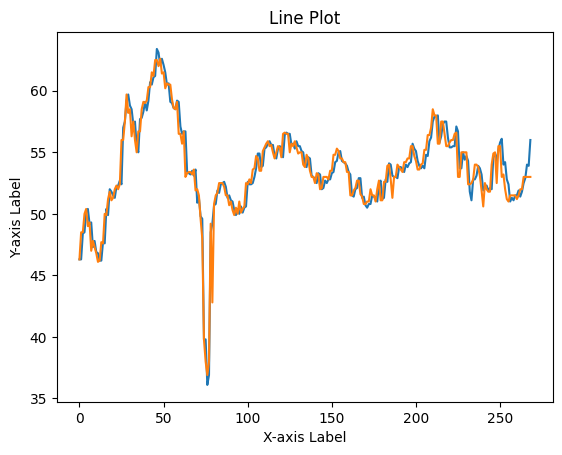

In [23]:
#replacing NaN value of consensus and actual with it's previous value

df['consensus'] = df['consensus'].fillna(method='ffill')
df['actual'] = df['actual'].fillna(method='ffill')

plt.plot(df.index, df['actual'], label='Actual')
plt.plot(df.index, df['consensus'], label='Consensus')

df['diff'] = df['actual'] - df['consensus']

#plt.plot(df.index, df['diff'], label='Consensus')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()